In [1]:
import xarray as xr
import cartopy.crs as ccrs
import numpy as np
from scipy import signal 

from datetime import datetime, timedelta

import matplotlib.pyplot as plt

from utility_programs.read_routines.GITM import auto_read as auto_read_gitm
from  utility_programs.read_routines.SAMI import auto_read as auto_read_sami
import utility_programs.filters as filters

import gc

from tqdm.auto import tqdm
import glob

import importlib

/glade/work/abukowski/conda-envs/SAMI3-GITM/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
gitmcol  = 'Rho'
samicol  = 'edens'


t_11 = datetime(2011,11,20)
t_05 = datetime(2011, 5,20)

t_start0 = timedelta(days=1, hours = 10)
t_end0 = timedelta(days=1, hours=18) # hours

afewtimes = [10,20,30,40,50,60]
afewtimes2 = [10,20,30,40,50,60,70,80]

dir11 = '/glade/u/home/abukowski/scratch/simstorm-20111121/postprocessed/'
dir05 = '/glade/u/home/abukowski/scratch/simstorm-20110521/postprocessed/'

In [3]:
times = []
t = datetime(2011,5,20)
max_dtime = t + timedelta(days=7)
while t < max_dtime:
    times.append(t)
    t+=timedelta(minutes=5)
times = np.array(times)

start_idx = np.argmin(np.abs(times - (datetime(2011,5,21,10))))
end_idx = np.argmin(np.abs(times - datetime(2011,5,21,18)))

In [4]:
start_idx, end_idx

(408, 504)

In [5]:
def get_fit(array):
    return xr.apply_ufunc(filters.make_fits, array)

def get_diffs(array):
    return 100*(array - get_fit(array))/array

In [6]:
def panel_of_maps(da,
                  times,
                  vlims,):
    
    p = da.isel(time=times).plot(x="lon", y="lat", col="time",
                                     transform=ccrs.PlateCarree(),
                                     subplot_kws={"projection": ccrs.PlateCarree(),
                                                 },
                                     col_wrap=2, vmin=-vlims, vmax = vlims, cmap = 'bwr',
                                    aa=True, )

    for ax in p.axs.flatten():
        ax.coastlines(alpha=0.6)
        ax.gridlines(color='black', alpha=0.5, linestyle='--')
    

        
    p.fig.suptitle('alt = %i km' % da.alt.mean())

    plt.show()
    plt.close('all')

    
    
    
    
def panel_of_keos(da,
                  lons,
                  vlims,):
    
    p = da.sel(lon=lons, method='nearest').plot(x="time", y="lat", col="lon",
                                     col_wrap=2, vmin=-vlims, vmax = vlims, cmap = 'bwr',
                                    aa=True)


    p.fig.suptitle('alt = %i km' % da.alt.mean())

    plt.show()
    plt.close('all')
    
    
    
def panel_of_lat_keos(da,
                  lats,
                  vlims,):
    
    p = da.sel(lat=lats, method='nearest').plot(x="time", y="lon", col="lat",
                                     col_wrap=2, vmin=-vlims, vmax = vlims, cmap = 'bwr',
                                    aa=True)


    p.fig.suptitle('alt = %i km' % da.alt.mean())

    plt.show()
    plt.close('all')


In [7]:
may_edens_full = auto_read_sami(dir05+"Full", cols=samicol, start_idx=start_idx, end_idx = end_idx, use_dask = False)
may_edens_half = auto_read_sami(dir05+"Half", cols=samicol, start_idx=start_idx, end_idx = end_idx, use_dask = False)

may_rho_full = auto_read_gitm(dir05+"Full", start_idx=start_idx, end_idx=end_idx, cols = gitmcol)
may_rho_half = auto_read_gitm(dir05+"Half", start_idx=start_idx, end_idx=end_idx, cols = gitmcol)

In [8]:
nov_edens_full = auto_read_sami(dir11+"Full", cols=samicol, start_idx=start_idx, end_idx = end_idx, use_dask = False)
# nov_edens_half = auto_read_sami(dir11+"Half", cols=samicol, start_idx=start_idx, end_idx = end_idx, use_dask = False)

nov_rho_full = auto_read_gitm(dir11+"Full", start_idx=start_idx, end_idx=end_idx, cols = gitmcol)
nov_rho_half = auto_read_gitm(dir11+"Half", start_idx=start_idx, end_idx=end_idx, cols = gitmcol)

In [9]:
filters = importlib.reload(filters)

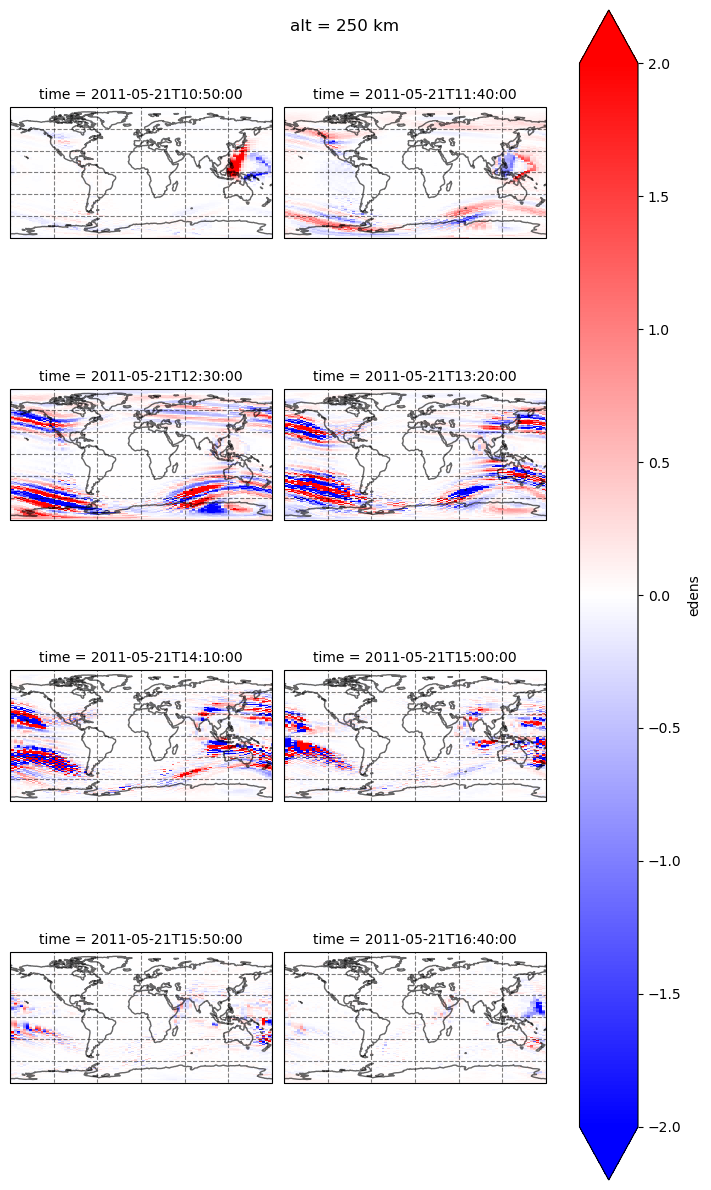

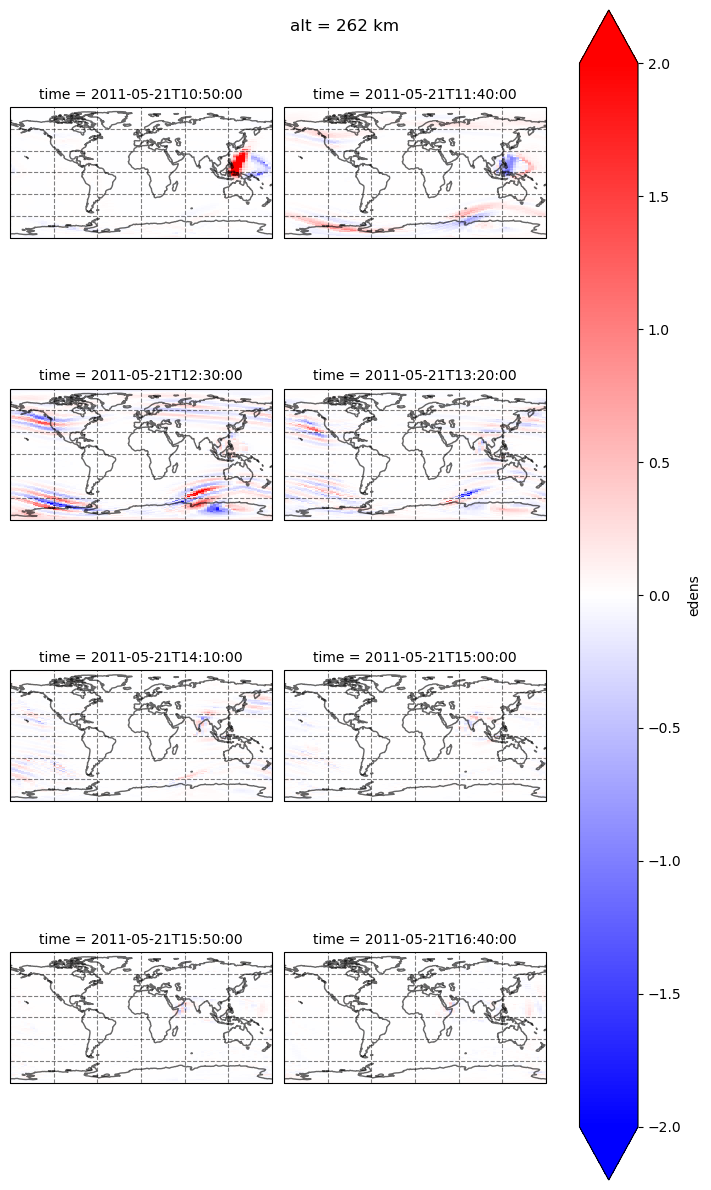

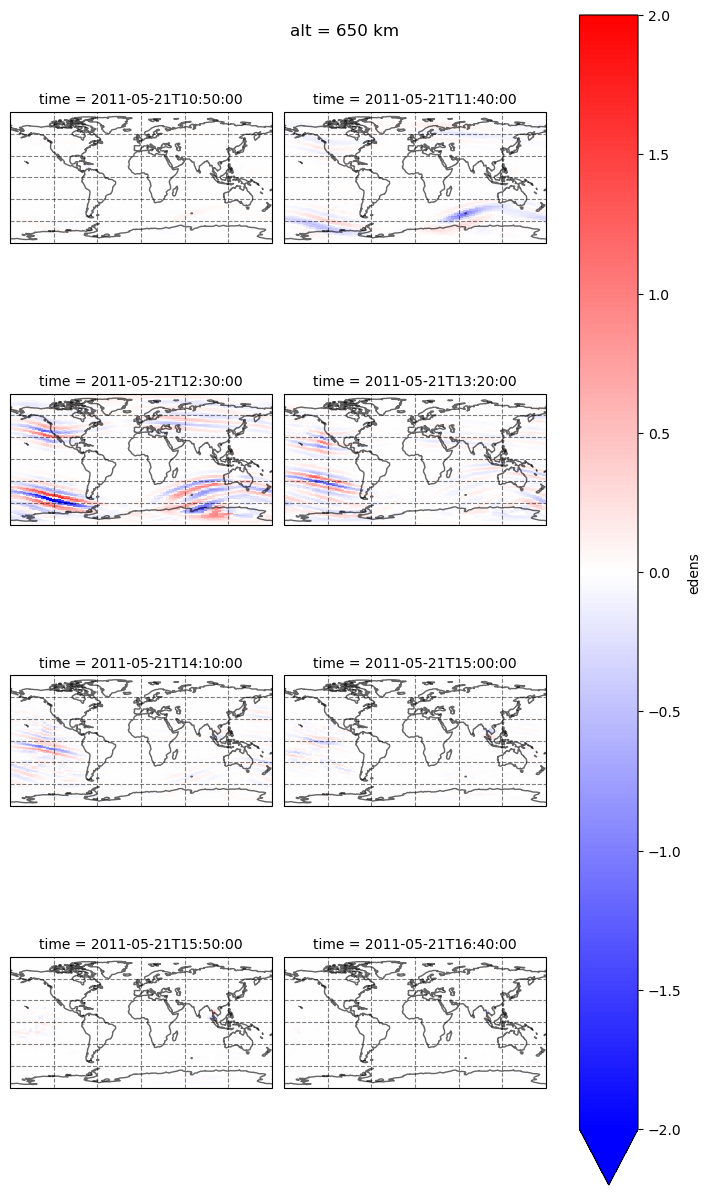

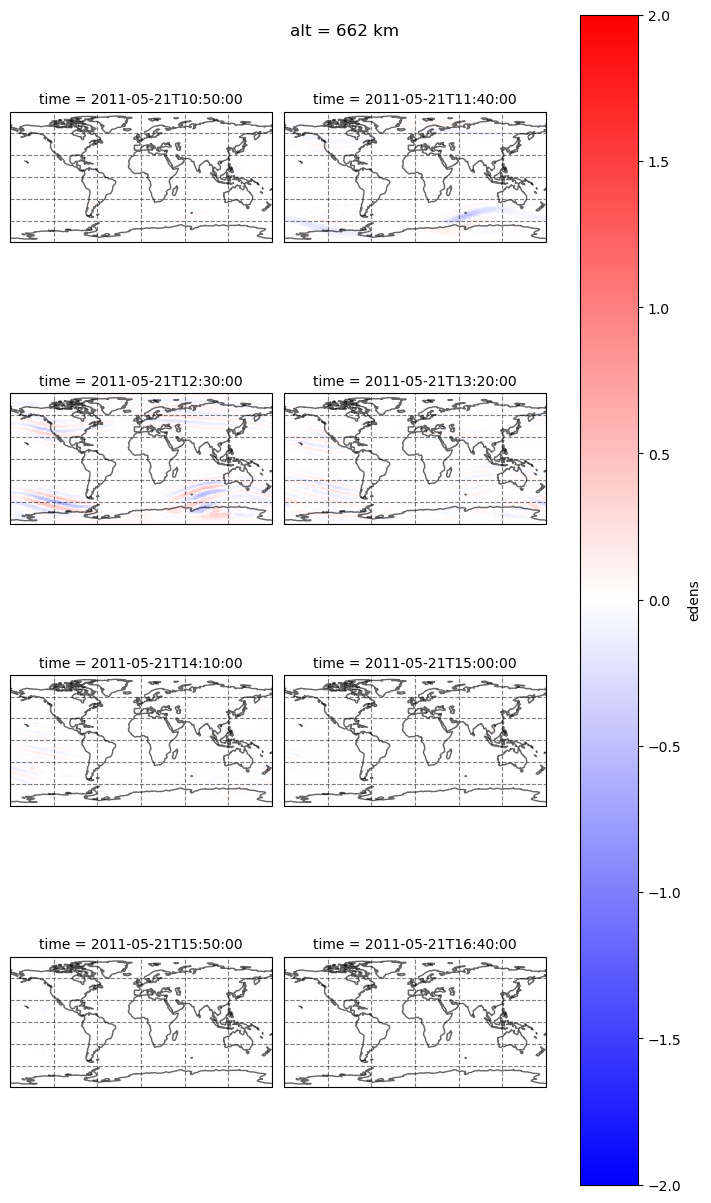

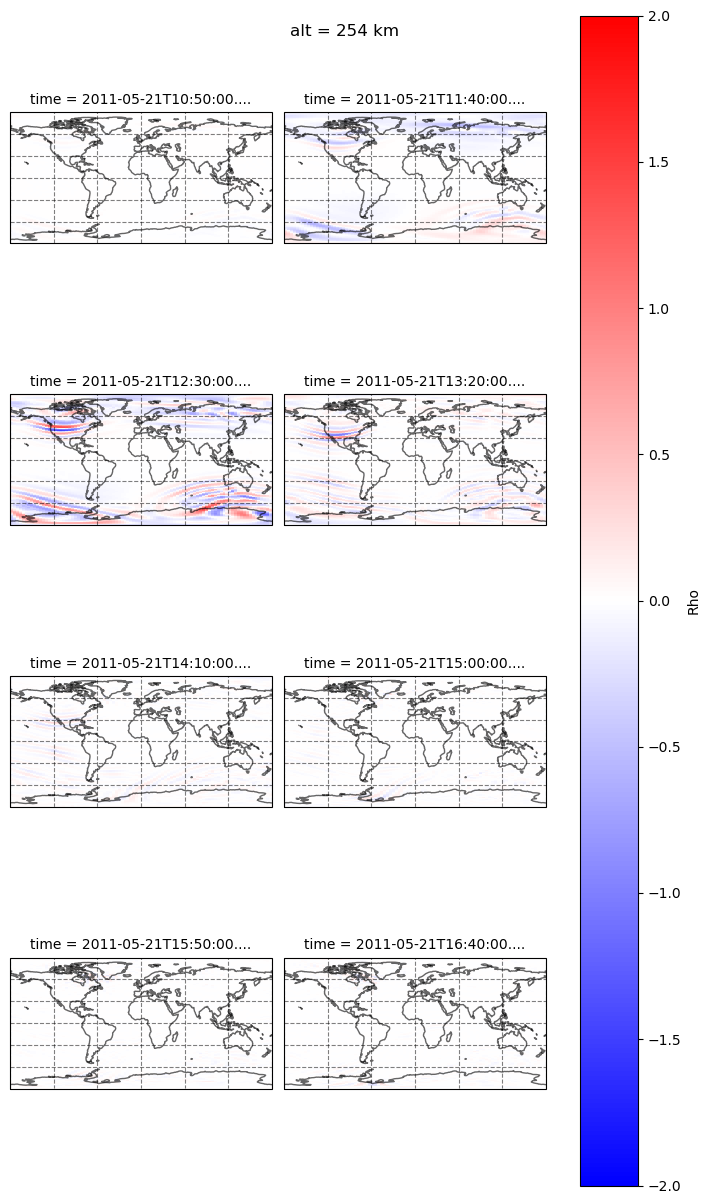

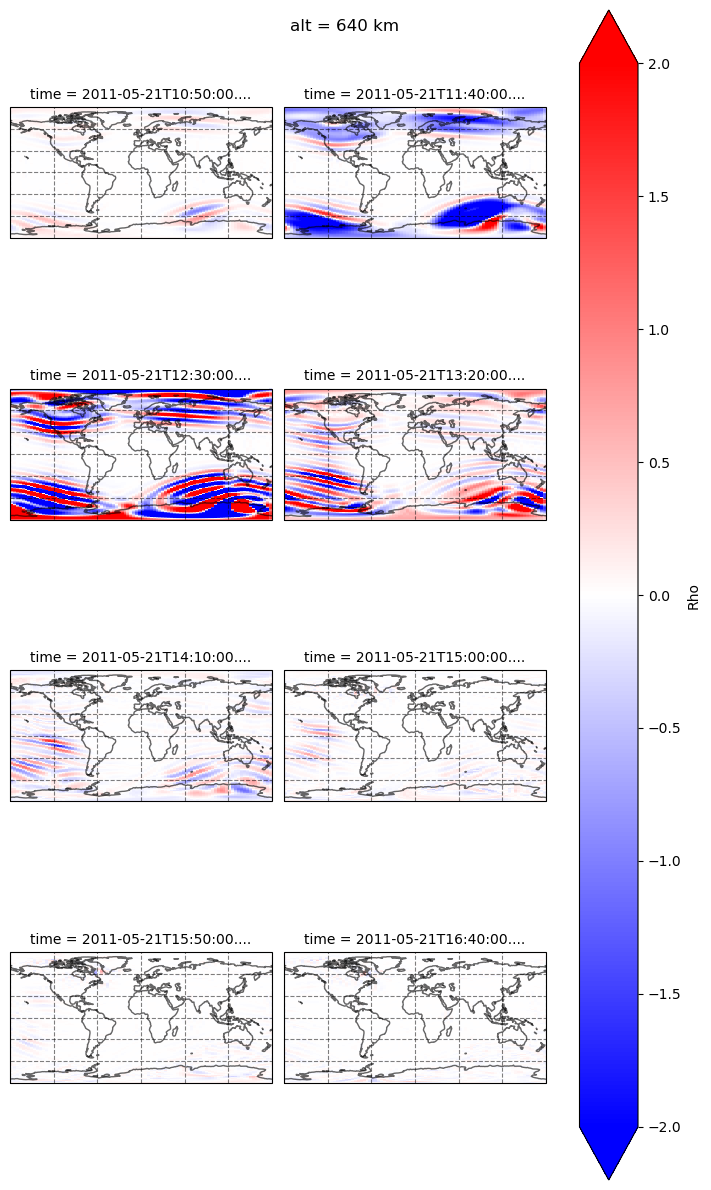

In [10]:
panel_of_maps(get_diffs(may_edens_full.edens.sel(alt=250, method='nearest')),
              afewtimes2, 2)

panel_of_maps(get_diffs(may_edens_half.edens.sel(alt=250, method='nearest')),
              afewtimes2, 2)

panel_of_maps(get_diffs(may_edens_full.edens.sel(alt=650, method='nearest')),
              afewtimes2, 2)

panel_of_maps(get_diffs(may_edens_half.edens.sel(alt=650, method='nearest')),
              afewtimes2, 2)

panel_of_maps(get_diffs(may_rho_full.Rho.sel(alt=250, method='nearest')),
              afewtimes2, 2)

panel_of_maps(get_diffs(may_rho_half.Rho.sel(alt=250, method='nearest')),
              afewtimes2, 2)

panel_of_maps(get_diffs(may_rho_full.Rho.sel(alt=650, method='nearest')),
              afewtimes2, 2)

panel_of_maps(get_diffs(may_rho_half.Rho.sel(alt=650, method='nearest')),
              afewtimes2, 2)

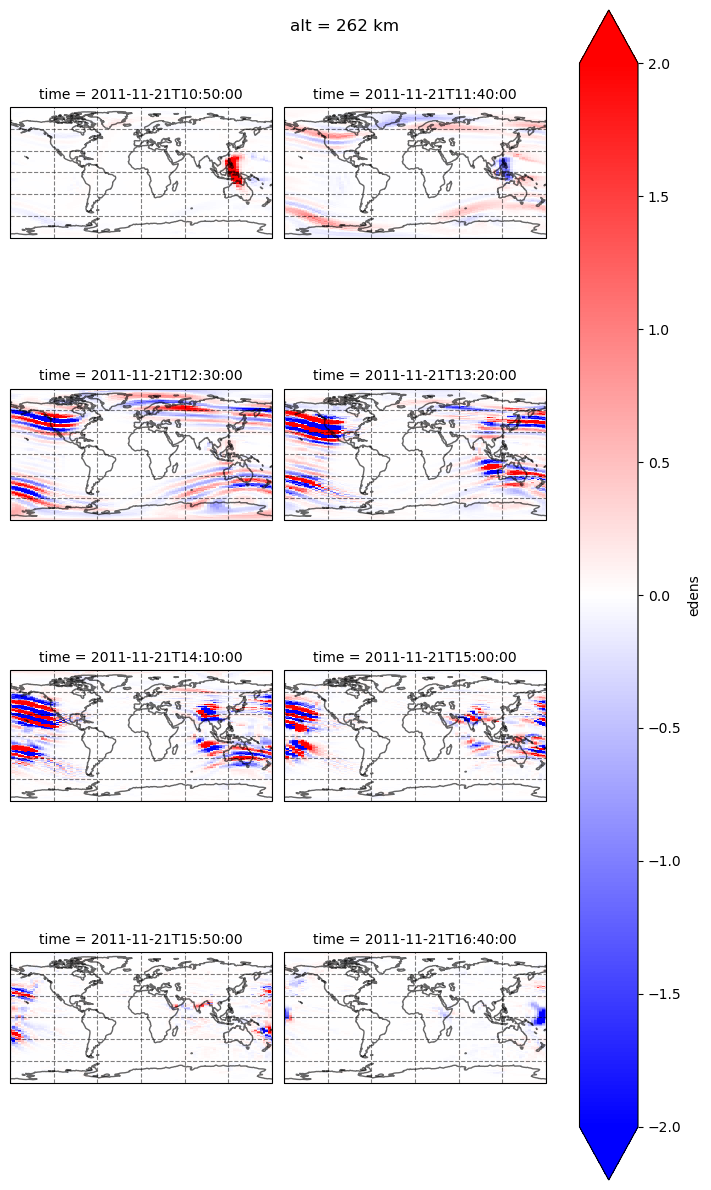

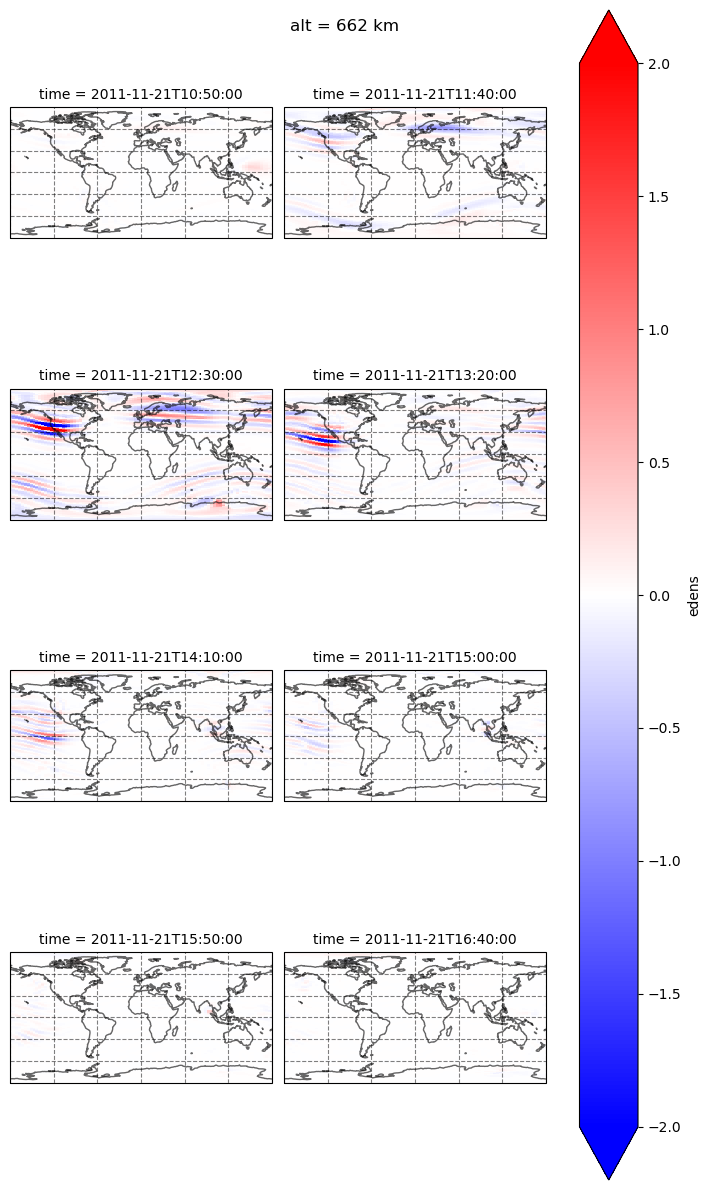

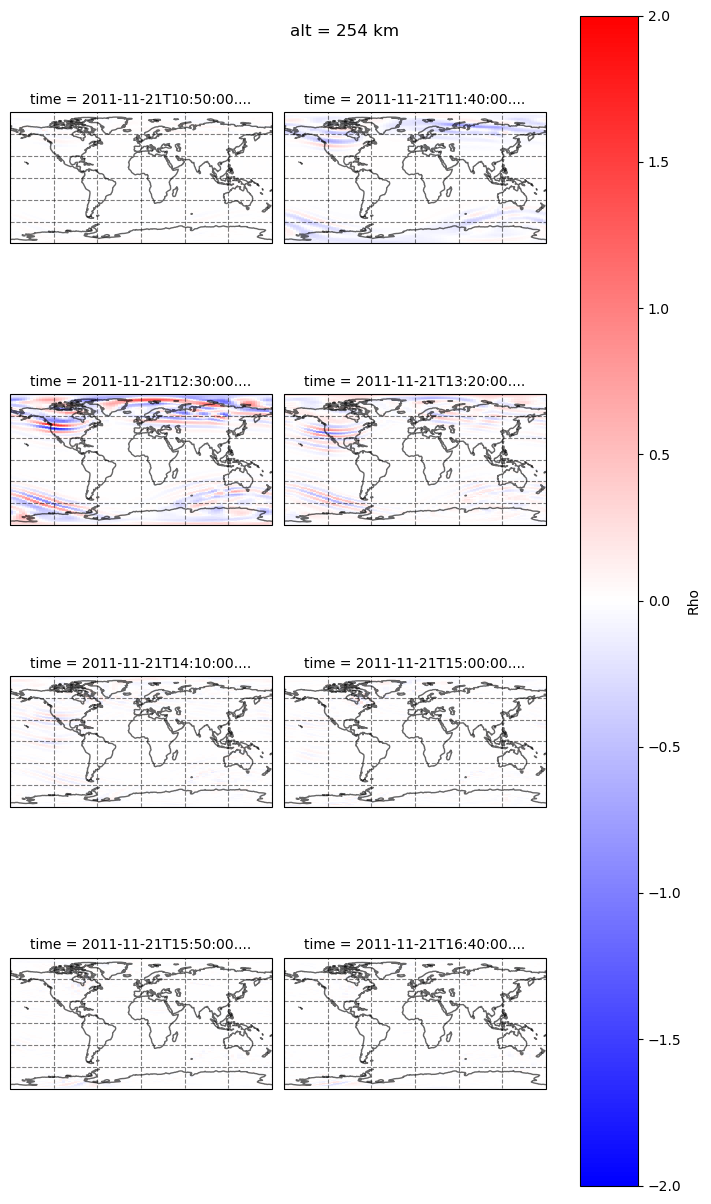

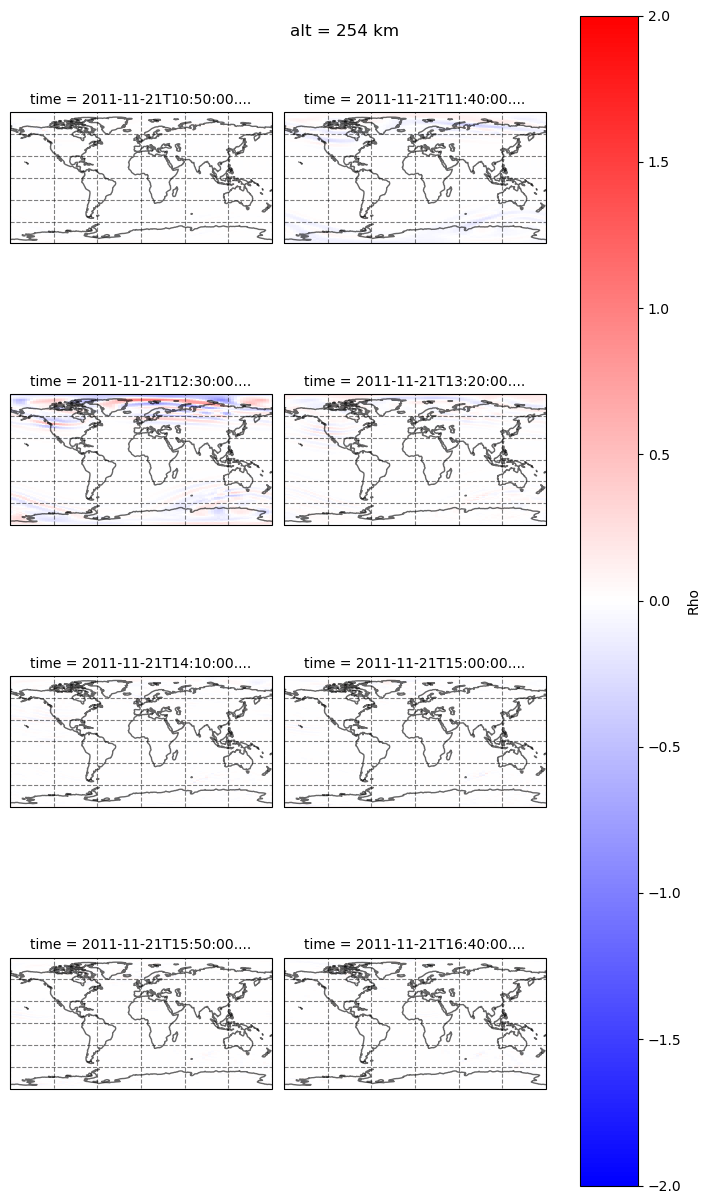

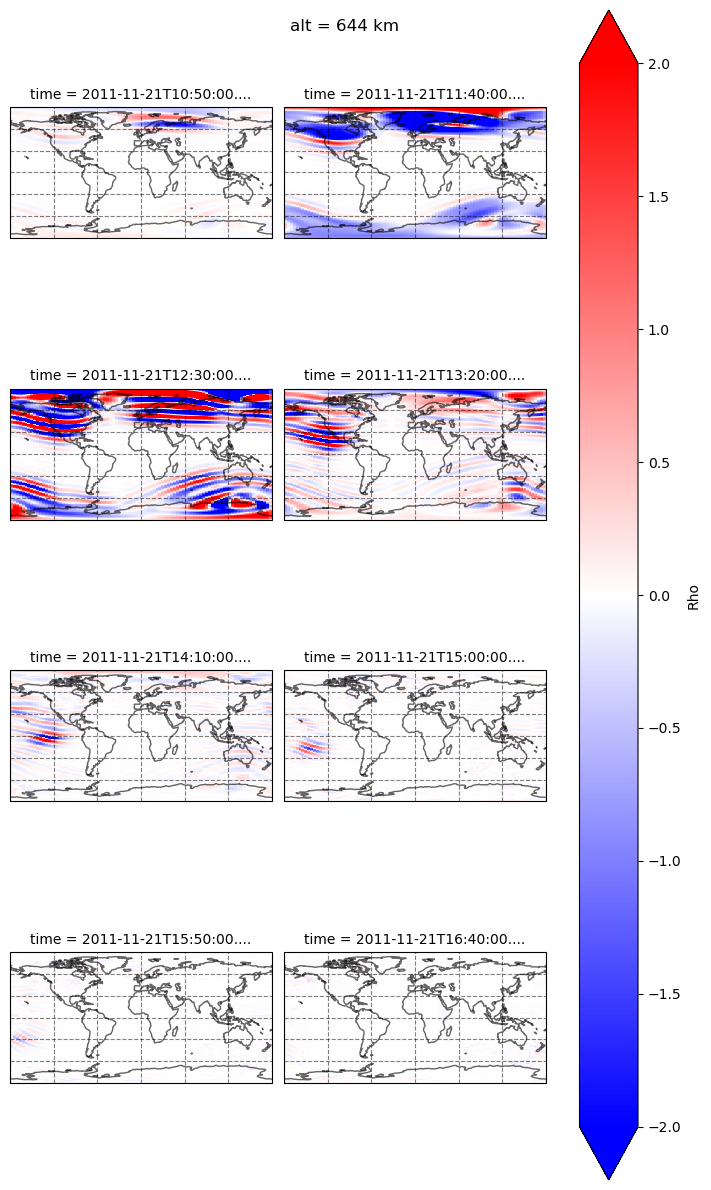

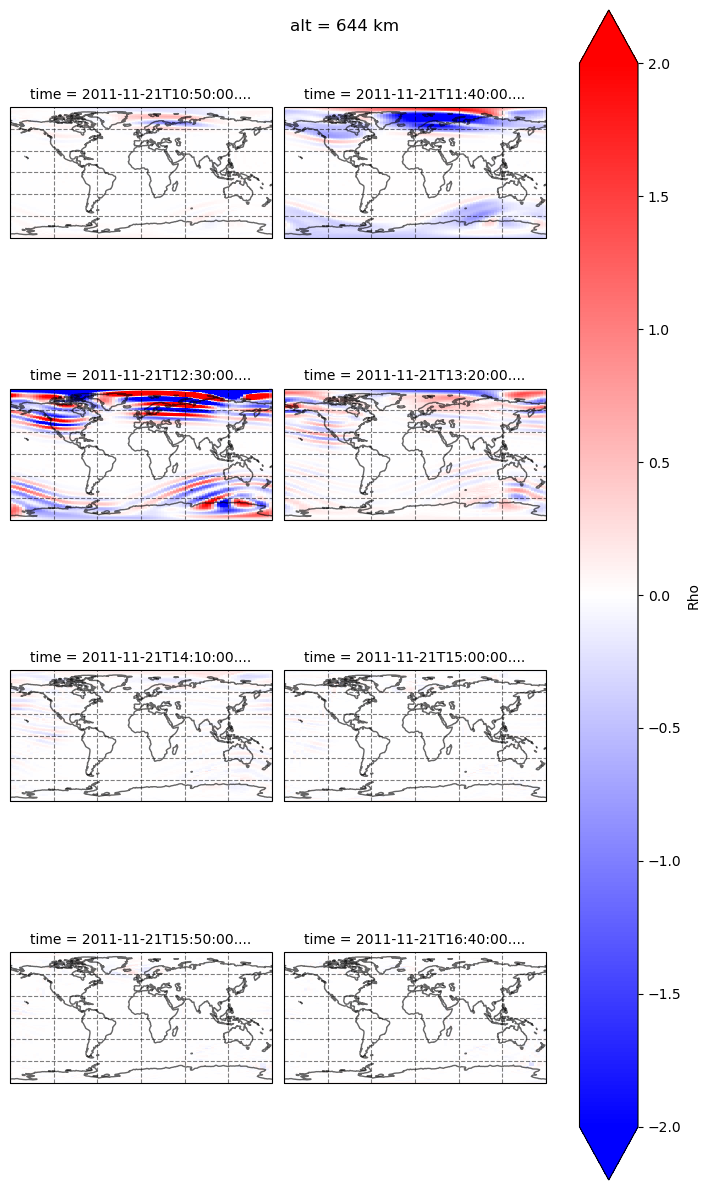

In [11]:
panel_of_maps(get_diffs(nov_edens_full.edens.sel(alt=250, method='nearest')),
              afewtimes2, 2)

# panel_of_maps(get_diffs(nov_edens_half.edens.sel(alt=250, method='nearest')),
#               afewtimes2, 2)

panel_of_maps(get_diffs(nov_edens_full.edens.sel(alt=650, method='nearest')),
              afewtimes2, 2)

# panel_of_maps(get_diffs(nov_edens_half.edens.sel(alt=650, method='nearest')),
#               afewtimes2, 2)

panel_of_maps(get_diffs(nov_rho_full.Rho.sel(alt=250, method='nearest')),
              afewtimes2, 2)

panel_of_maps(get_diffs(nov_rho_half.Rho.sel(alt=250, method='nearest')),
              afewtimes2, 2)

panel_of_maps(get_diffs(nov_rho_full.Rho.sel(alt=650, method='nearest')),
              afewtimes2, 2)

panel_of_maps(get_diffs(nov_rho_half.Rho.sel(alt=650, method='nearest')),
              afewtimes2, 2)

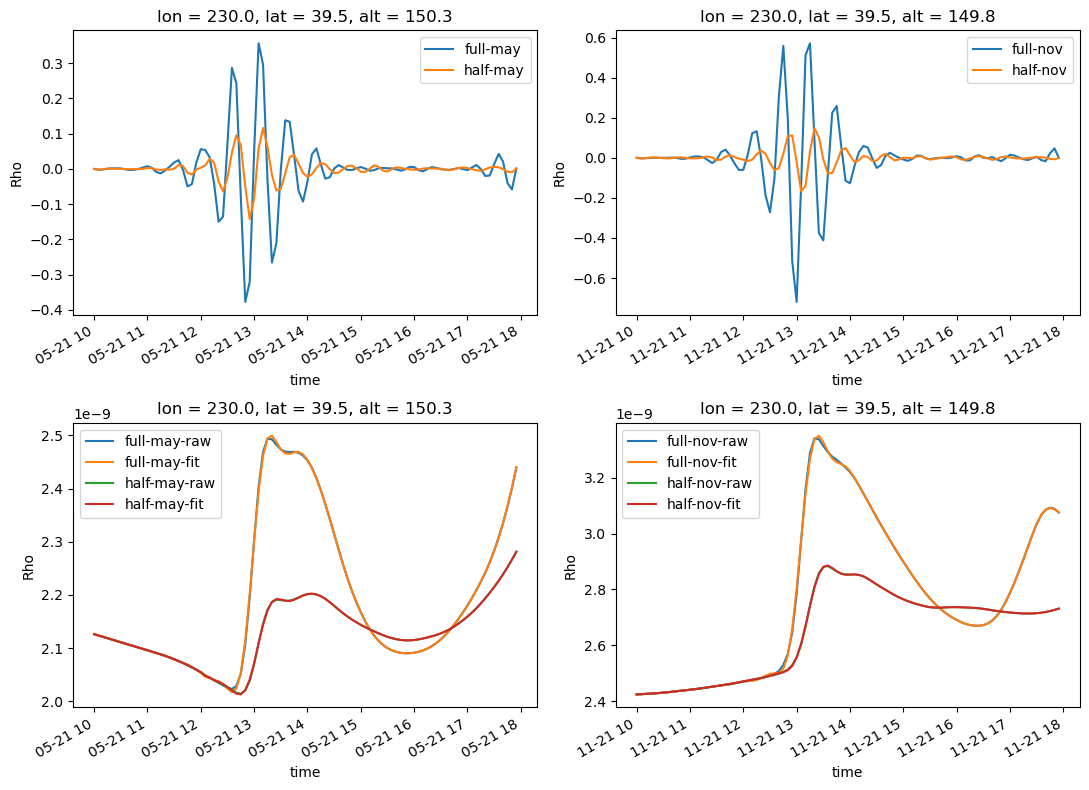

In [12]:
fig, axs = plt.subplots(nrows=2, ncols = 2, figsize=(11,8))

get_diffs(may_rho_full.Rho.sel(lon=180+50, alt=150, lat=40, method='nearest')).plot(ax=axs[0, 0], label='full-may')
get_diffs(may_rho_half.Rho.sel(lon=180+50, alt=150, lat=40, method='nearest')).plot(ax=axs[0, 0], label='half-may')
may_rho_full.Rho.sel(lon=180+50, alt=150, lat=40, method='nearest').plot(ax=axs[1, 0], label='full-may-raw')
get_fit(may_rho_full.Rho.sel(lon=180+50, alt=150, lat=40, method='nearest')).plot(ax=axs[1, 0], label='full-may-fit')
may_rho_half.Rho.sel(lon=180+50, alt=150, lat=40, method='nearest').plot(ax=axs[1, 0], label='half-may-raw')
get_fit(may_rho_half.Rho.sel(lon=180+50, alt=150, lat=40, method='nearest')).plot(ax=axs[1, 0], label='half-may-fit')


get_diffs(nov_rho_full.Rho.sel(lon=180+50, alt=150, lat=40, method='nearest')).plot(ax=axs[0, 1], label='full-nov')
get_diffs(nov_rho_half.Rho.sel(lon=180+50, alt=150, lat=40, method='nearest')).plot(ax=axs[0, 1], label='half-nov')
nov_rho_full.Rho.sel(lon=180+50, alt=150, lat=40, method='nearest').plot(ax=axs[1, 1], label='full-nov-raw')
get_fit(nov_rho_full.Rho.sel(lon=180+50, alt=150, lat=40, method='nearest')).plot(ax=axs[1, 1], label='full-nov-fit')
nov_rho_half.Rho.sel(lon=180+50, alt=150, lat=40, method='nearest').plot(ax=axs[1, 1], label='half-nov-raw')
get_fit(nov_rho_half.Rho.sel(lon=180+50, alt=150, lat=40, method='nearest')).plot(ax=axs[1, 1], label='half-nov-fit')

axs[0,0].legend()
axs[1,0].legend()
axs[0,1].legend()
axs[1,1].legend()
fig.tight_layout()

plt.show()
plt.close()

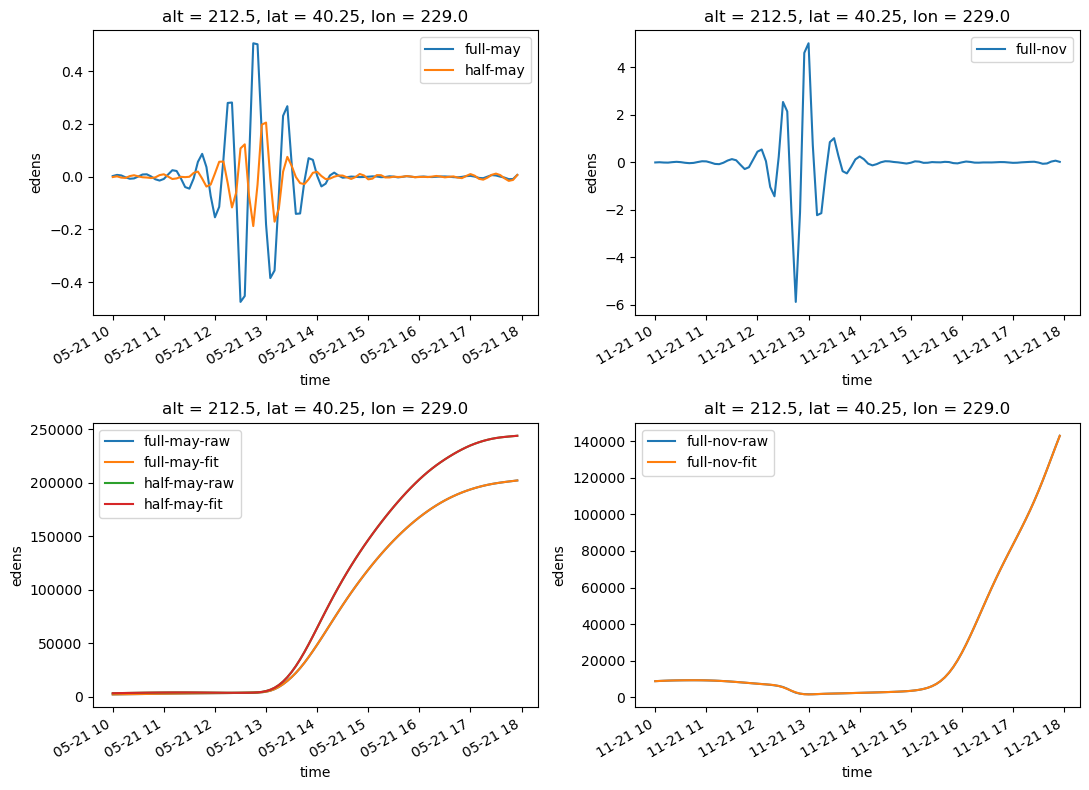

In [13]:
fig, axs = plt.subplots(nrows=2, ncols = 2, figsize=(11,8))

get_diffs(may_edens_full.edens.sel(lon=180+50, alt=150, lat=40, method='nearest')).plot(ax=axs[0, 0], label='full-may')
get_diffs(may_edens_half.edens.sel(lon=180+50, alt=150, lat=40, method='nearest')).plot(ax=axs[0, 0], label='half-may')
may_edens_full.edens.sel(lon=180+50, alt=150, lat=40, method='nearest').plot(ax=axs[1, 0], label='full-may-raw')
get_fit(may_edens_full.edens.sel(lon=180+50, alt=150, lat=40, method='nearest')).plot(ax=axs[1, 0], label='full-may-fit')
may_edens_half.edens.sel(lon=180+50, alt=150, lat=40, method='nearest').plot(ax=axs[1, 0], label='half-may-raw')
get_fit(may_edens_half.edens.sel(lon=180+50, alt=150, lat=40, method='nearest')).plot(ax=axs[1, 0], label='half-may-fit')


get_diffs(nov_edens_full.edens.sel(lon=180+50, alt=150, lat=40, method='nearest')).plot(ax=axs[0, 1], label='full-nov')
# get_diffs(nov_edens_half.edens.sel(lon=180+50, alt=150, lat=40, method='nearest')).plot(ax=axs[0, 1], label='half-nov')
nov_edens_full.edens.sel(lon=180+50, alt=150, lat=40, method='nearest').plot(ax=axs[1, 1], label='full-nov-raw')
get_fit(nov_edens_full.edens.sel(lon=180+50, alt=150, lat=40, method='nearest')).plot(ax=axs[1, 1], label='full-nov-fit')
# nov_edens_half.edens.sel(lon=180+50, alt=150, lat=40, method='nearest').plot(ax=axs[1, 1], label='half-nov-raw')
# get_fit(nov_edens_half.edens.sel(lon=180+50, alt=150, lat=40, method='nearest')).plot(ax=axs[1, 1], label='half-nov-fit')

axs[0,0].legend()
axs[1,0].legend()
axs[0,1].legend()
axs[1,1].legend()
fig.tight_layout()

plt.show()
plt.close()

In [14]:
lons = np.linspace(0,360,7)[:-1]

In [15]:
lons

array([  0.,  60., 120., 180., 240., 300.])

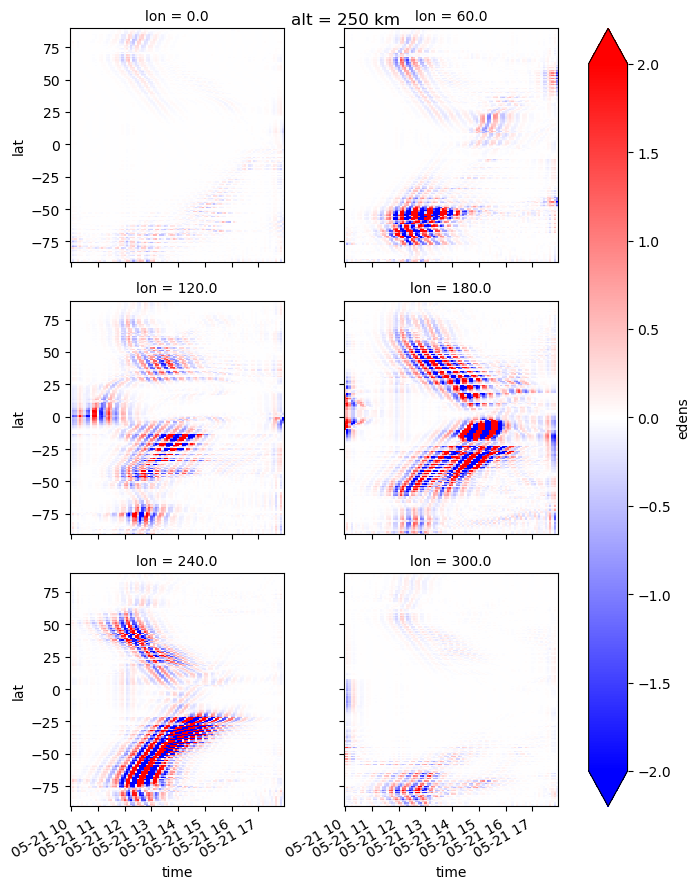

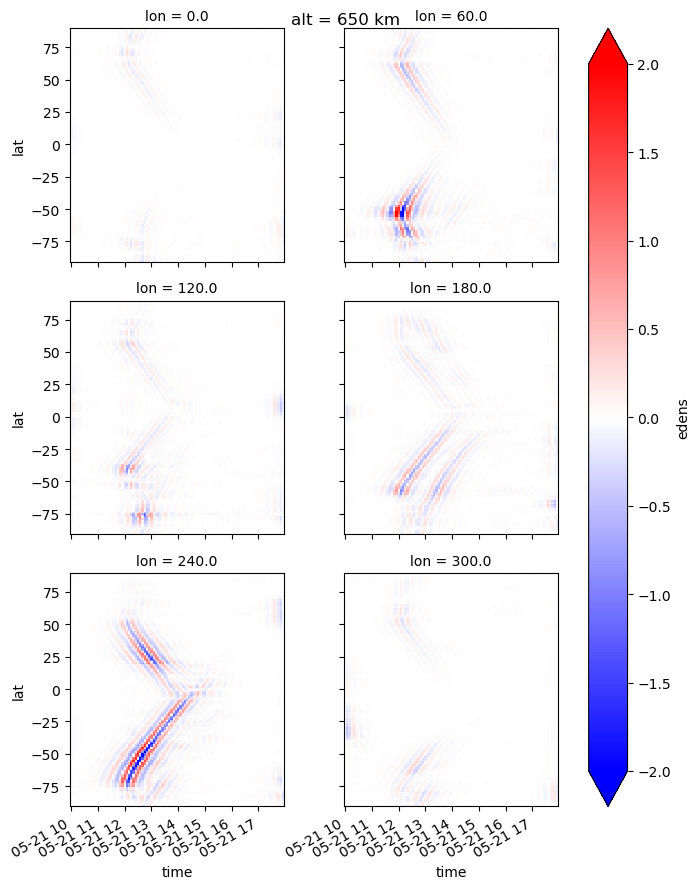

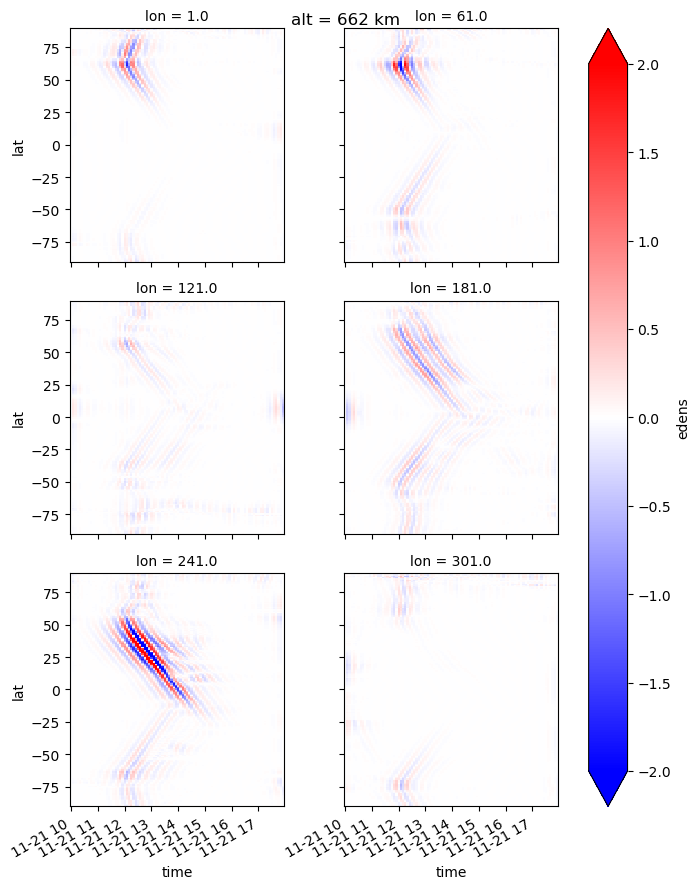

In [16]:
panel_of_keos(get_diffs(may_edens_full.edens.sel(alt=250, method='nearest')),
              lons, 2)

panel_of_keos(get_diffs(may_edens_full.edens.sel(alt=650, method='nearest')),
              lons, 2)

panel_of_keos(get_diffs(nov_edens_full.edens.sel(alt=250, method='nearest')),
              lons, 2)

panel_of_keos(get_diffs(nov_edens_full.edens.sel(alt=650, method='nearest')),
              lons, 2)

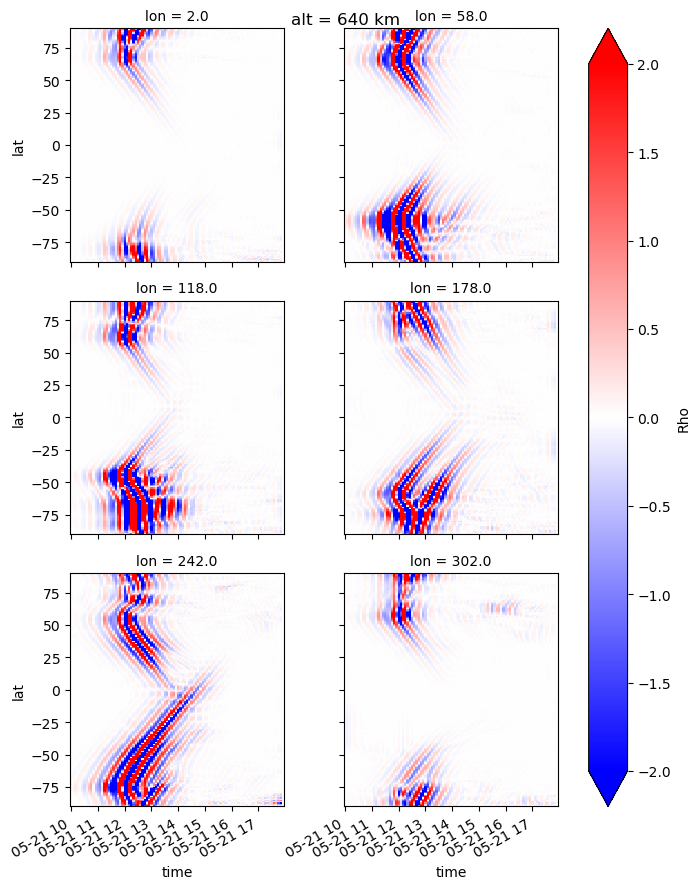

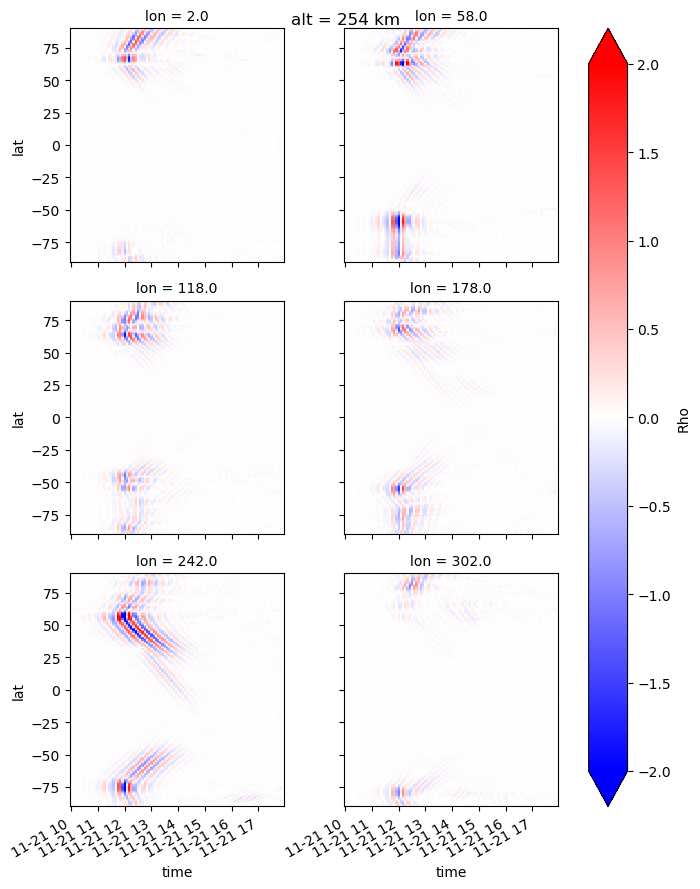

In [17]:
panel_of_keos(get_diffs(may_rho_full.Rho.sel(alt=250, method='nearest')),
              lons, 2)

panel_of_keos(get_diffs(may_rho_full.Rho.sel(alt=650, method='nearest')),
              lons, 2)

panel_of_keos(get_diffs(nov_rho_full.Rho.sel(alt=250, method='nearest')),
              lons, 2)

panel_of_keos(get_diffs(nov_rho_full.Rho.sel(alt=650, method='nearest')),
              lons, 2)

In [18]:
lats = np.linspace(-45,45, 6); lats

array([-45., -27.,  -9.,   9.,  27.,  45.])

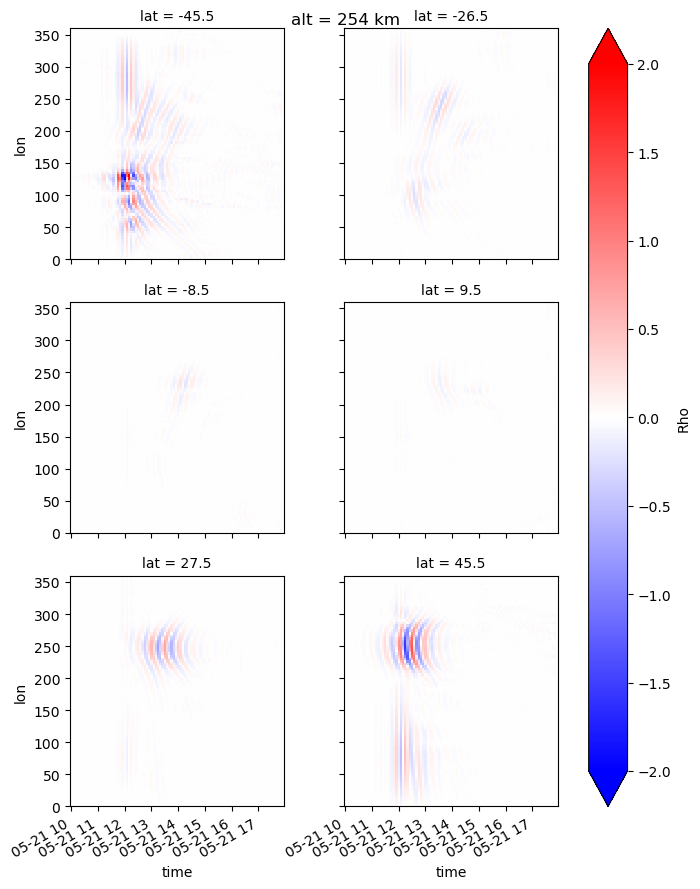

In [19]:
panel_of_lat_keos(get_diffs(may_rho_full.Rho.sel(alt=250, method='nearest')),
              lats, 2)

panel_of_lat_keos(get_diffs(may_rho_full.Rho.sel(alt=650, method='nearest')),
              lats, 2)

panel_of_lat_keos(get_diffs(nov_rho_full.Rho.sel(alt=250, method='nearest')),
              lats, 2)

panel_of_lat_keos(get_diffs(nov_rho_full.Rho.sel(alt=650, method='nearest')),
              lats, 2)

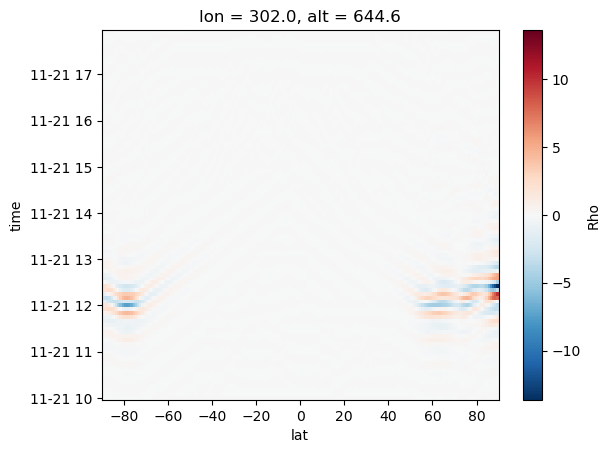

In [20]:
get_diffs(nov_rho_full.Rho.sel(alt=650, lon=300, method='nearest')).plot()

In [21]:
plt.imshow(get_diffs((nov_rho_full.Rho.sel(alt=650, lon=2, method='nearest')).T.values - (may_rho_full.Rho.sel(alt=650,lon=2, method='nearest')).T.values),
          cmap = 'bwr', aspect='auto', vmin=-20, vmax=20)
plt.colorbar()